## Compute missing observation values ratio in obs files

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
import sklearn
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import netCDF4 as nc
import xarray as xr
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter

In [2]:
OMs = ["Guyane","Guadeloupe","Martinique","Reunion","NC","Polynesie"]

Stations={"Guyane":["Cayenne-Matoury","Maripasoula","Saint-Georges","Saint-Laurent"],
          "Guadeloupe" : ["Raizet","Saint-Barthelemy"],"Martinique":["Lamentin"],
          "Reunion":["Gillot","Pamandzi","Europa","Glorieuses","Juan-de-Nova","Tromelin"],
          "NC":["Koumac","Tontouta","Noumea","Ouanaham","Hihifo","Maopoopo"],
          "Polynesie":["Faaa","Hao-aero","Hiva-oa","Mangareva","Rapa","Takaroa"]}

In [3]:
def calcul_dispo_hourly():
    
    '''
    This method aims at calculating the ratios of missing values in 3hr obs.
    '''
    
    for OM in OMs:
        
        folder = "/OBS/"
        
        for station in Stations[OM]:
            
            if OM == "Guyane":
            
                file = folder+"obs_trihoraire_"+station+"_1988-2014.csv"
            
            elif OM == "Martinique":
                
                file = folder+"obs_trihoraire_"+station+"_1987-2014.csv"
                
            else:
                
                file = folder+"obs_trihoraire_"+station+"_1985-2014.csv"

            
            data = pd.read_csv(file)
            
            total_shape=data.shape[0]
            
            tas = data['tas'].dropna()
            
            hurs = data['hurs'].dropna()
            
            
            
            tas_shape = tas.shape[0]
            
            hurs_shape =hurs.shape[0]
            
            tas_missing_values = (total_shape-tas_shape)*100/total_shape
            
            hurs_missing_values = (total_shape-hurs_shape)*100/total_shape
            
            
            
            dataframe_station=pd.DataFrame(index=[station])
            
            dataframe_station['tas']=tas_missing_values
            
            dataframe_station['hurs']=hurs_missing_values
            
            
            dataframe_station.to_csv("/OBS/"+station+"_3-hour_missing_values.csv")

In [4]:
calcul_dispo_hourly()

In [5]:
def calcul_dispo_daily():
    
    '''
    This method aims at calculating the ratios of missing values in daily obs.
    '''
    
     for OM in OMs:
        
        folder = "/home/baldl/Documents/these/data_obs/"+OM+"/daily/"
        
        for station in Stations[OM]:
            
            
            file = folder+"obs_daily_"+station+"_1985-2014.csv"
            

            data = pd.read_csv(file)
            
            if OM=="Guyane":
                
                data=data.loc[data["time"]>="1988-01-01"]

            total_shape=data.shape[0]
            
            tasmax = data['tasmax'].dropna()
            
            hursmin = data['hursmin'].dropna()
            
            tasmin = data['tasmin'].dropna()
            
            hursmax = data['hursmax'].dropna()
            
            HIX = data['HIX'].dropna()
            
            HIN = data['HIN'].dropna()
            
            HIM = data['HIM'].dropna()
            
            
            
            tasmax_shape = tasmax.shape[0]
            
            
            hursmin_shape =hursmin.shape[0]
            
            tasmin_shape = tasmin.shape[0]
            
            hursmax_shape =hursmax.shape[0]
            
            HIX_shape = HIX.shape[0]
            
            HIN_shape =HIN.shape[0]
            
            HIM_shape = HIM.shape[0]
            
            
            
            tasmax_missing_values = (total_shape-tasmax_shape)*100/total_shape
            
            hursmin_missing_values = (total_shape-hursmin_shape)*100/total_shape
            
            tasmin_missing_values = (total_shape-tasmin_shape)*100/total_shape
            
            hursmax_missing_values = (total_shape-hursmax_shape)*100/total_shape
            
            HIX_missing_values = (total_shape-HIX_shape)*100/total_shape
            
            HIN_missing_values = (total_shape-HIN_shape)*100/total_shape
            
            HIM_missing_values = (total_shape-HIM_shape)*100/total_shape
            
            
            
            dataframe_station=pd.DataFrame(index=[station])
            
            dataframe_station['tasmax']=tasmax_missing_values
            
            dataframe_station['hursmin']=hursmin_missing_values
            
            dataframe_station['tasmin']=tasmin_missing_values
            
            dataframe_station['hursmax']=hursmax_missing_values
            
            dataframe_station['HIX']=HIX_missing_values
            
            dataframe_station['HIN']=HIN_missing_values
            
            dataframe_station['HIM']=HIM_missing_values
            
            
            dataframe_station.to_csv("/OBS/"+station+"_daily_missing_values.csv")

In [6]:
calcul_dispo_daily()

             time  tasmax  hursmin  tasmin  hursmax        HIX     HIN  \
1095   1988-01-01    28.7     70.0    22.8     99.0  32.090735  23.255   
1096   1988-01-02    30.6     64.0    24.0     99.0  34.975876  24.515   
1097   1988-01-03    29.0     67.0    23.2     99.0  32.192923  23.675   
1098   1988-01-04    29.7     69.0    23.8     99.0  34.104300  24.305   
1099   1988-01-05    29.4     72.0    25.0     94.0  34.052696  25.500   
...           ...     ...      ...     ...      ...        ...     ...   
10952  2014-12-27    29.3     70.0    22.8     96.0  33.402540  23.216   
10953  2014-12-28    30.1     65.0    23.3     95.0  34.106656  23.728   
10954  2014-12-29    30.0     66.0    22.2     96.0  34.112575  22.586   
10955  2014-12-30    30.1     63.0    24.6     94.0  33.663038  25.080   
10956  2014-12-31    30.2     59.0    24.8     90.0  33.016924  25.238   

             HIM  
1095   27.672867  
1096   29.745438  
1097   27.933962  
1098   29.204650  
1099   29.776348

             time  tasmax  hursmin  tasmin  hursmax        HIX     HIN  \
0      1985-01-01    33.0     55.0    24.6     88.0  37.819533  25.002   
1      1985-01-02    30.7     65.0    24.4     91.0  35.457685  24.831   
2      1985-01-03    31.0     66.0    24.7     95.0  36.442782  25.198   
3      1985-01-04    31.6     57.0    22.1     99.0  35.347993  22.520   
4      1985-01-05    31.6     50.0    21.8     98.0  33.648484  22.192   
...           ...     ...      ...     ...      ...        ...     ...   
10952  2014-12-27    33.0      NaN    26.0      NaN        NaN     NaN   
10953  2014-12-28    31.7      NaN    24.7      NaN        NaN     NaN   
10954  2014-12-29    32.0      NaN    25.2      NaN        NaN     NaN   
10955  2014-12-30    32.1      NaN    25.9      NaN        NaN     NaN   
10956  2014-12-31    31.1      NaN    26.6      NaN        NaN     NaN   

             HIM  
0      31.410766  
1      30.144342  
2      30.820391  
3      28.933996  
4      27.920242

             time  tasmax  hursmin  tasmin  hursmax        HIX     HIN  \
0      1985-01-01    29.5     77.0    23.0     99.0  35.444695  23.465   
1      1985-01-02    29.7     70.0    23.7     93.0  34.327066  24.122   
2      1985-01-03    27.4     67.0    22.5     99.0  29.256388  22.940   
3      1985-01-04    28.4     70.0    22.2     98.0  31.468574  22.612   
4      1985-01-05    29.7     67.0    22.1     98.0  33.670547  22.507   
...           ...     ...      ...     ...      ...        ...     ...   
10952  2014-12-27    31.0     63.0    24.5     91.0  35.624003  24.936   
10953  2014-12-28    31.5     66.0    25.0     91.0  37.696439  25.461   
10954  2014-12-29    31.2     63.0    25.7     90.0  36.084594  26.183   
10955  2014-12-30    31.4     65.0    25.8     89.0  37.139744  26.275   
10956  2014-12-31    31.8     58.0    25.3     90.0  36.047422  25.763   

             HIM  
0      29.454847  
1      29.224533  
2      26.098194  
3      27.040287  
4      28.088774

### Create a dataframe with missing value ratios

In [11]:
index_station=["Cayenne-Matoury","Maripasoula","Saint-Georges","Saint-Laurent",
                             "Raizet","Saint-Barthelemy","Lamentin","Gillot","Pamandzi",
               "Tromelin","Koumac","Tontouta","Noumea",
                            "Ouanaham","Hihifo","Maopoopo",
                             "Faaa",
               "Hiva-oa","Mangareva","Rapa","Takaroa"]

dataframe_hourly=pd.DataFrame(index=["Cayenne-Matoury\n(1988-2014)","Maripasoula\n(1988-2014)",
                                     "Saint-Georges\n(1988-2014)","Saint-Laurent\n(1988-2014)",
                             "Raizet","Saint-Barthelemy","Lamentin\n(1987-2014)","Gillot","Pamandzi",
                               "Tromelin","Koumac",
                                     "Tontouta","Noumea","Ouanaham","Hihifo","Maopoopo",
                             "Faaa",
                                     "Hiva-oa","Mangareva","Rapa","Takaroa"])

dataframe_daily=pd.DataFrame(index=["Cayenne-Matoury\n(1988-2014)","Maripasoula\n(1988-2014)",
                                    "Saint-Georges\n(1988-2014)","Saint-Laurent\n(1988-2014)",
                             "Raizet","Saint-Barthelemy","Lamentin","Gillot","Pamandzi","Tromelin",
                                    "Koumac","Tontouta","Noumea","Ouanaham","Hihifo","Maopoopo",
                             "Faaa",
                                    "Hiva-oa","Mangareva","Rapa","Takaroa"])

tas=[]
hurs=[]
tasmax=[]
tasmin=[]
hursmax=[]
hursmin=[]
HIX=[]
HIN=[]
HIM=[]

for station in index_station:
    data_hourly=pd.read_csv("/OBS/"+station+"_3-hour_missing_values.csv")
    data_daily=pd.read_csv("/OBS/"+station+"_daily_missing_values.csv")
    tas.append(data_hourly['tas'].values[0])
    hurs.append(data_hourly['hurs'].values[0])
    tasmax.append(data_daily['tasmax'].values[0])
    hursmin.append(data_daily['hursmin'].values[0])
    tasmin.append(data_daily['tasmin'].values[0])
    hursmax.append(data_daily['hursmax'].values[0])
    HIX.append(data_daily['HIX'].values[0])
    HIN.append(data_daily['HIN'].values[0])
    HIM.append(data_daily['HIM'].values[0])
    
dataframe_hourly['tas']=tas
dataframe_hourly['hurs']=hurs

dataframe_daily['tasmax']=tasmax
dataframe_daily['tasmin']=tasmin
dataframe_daily['hursmax']=hursmax
dataframe_daily['hursmin']=hursmin
dataframe_daily['HIX']=HIX
dataframe_daily['HIN']=HIN
dataframe_daily['HIM']=HIM

dataframe_daily

,tasmax,tasmin,hursmax,hursmin,HIX,HIN,HIM
Cayenne-Matoury\n(1988-2014),0.000000,0.000000,0.091259,0.101399,0.101399,0.091259,0.101399
Maripasoula\n(1988-2014),1.013993,1.084973,4.370310,4.400730,4.400730,4.370310,4.502129
Saint-Georges\n(1988-2014),0.000000,0.000000,1.450010,1.794768,1.794768,1.450010,1.804908
Saint-Laurent\n(1988-2014),0.304198,0.304198,4.421010,4.431150,4.431150,4.421010,4.512269
Raizet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Saint-Barthelemy,1.953089,1.953089,8.551611,8.551611,8.715889,8.706763,8.761522
Lamentin,0.000000,0.000000,0.200785,0.200785,0.200785,0.200785,0.200785
Gillot,0.000000,0.000000,0.009127,0.000000,0.000000,0.009127,0.009127
Pamandzi,0.000000,0.000000,0.264671,0.264671,0.264671,0.264671,0.264671
Tromelin,3.130419,3.121292,5.640230,5.329926,5.348179,5.640230,5.649357


### Plot

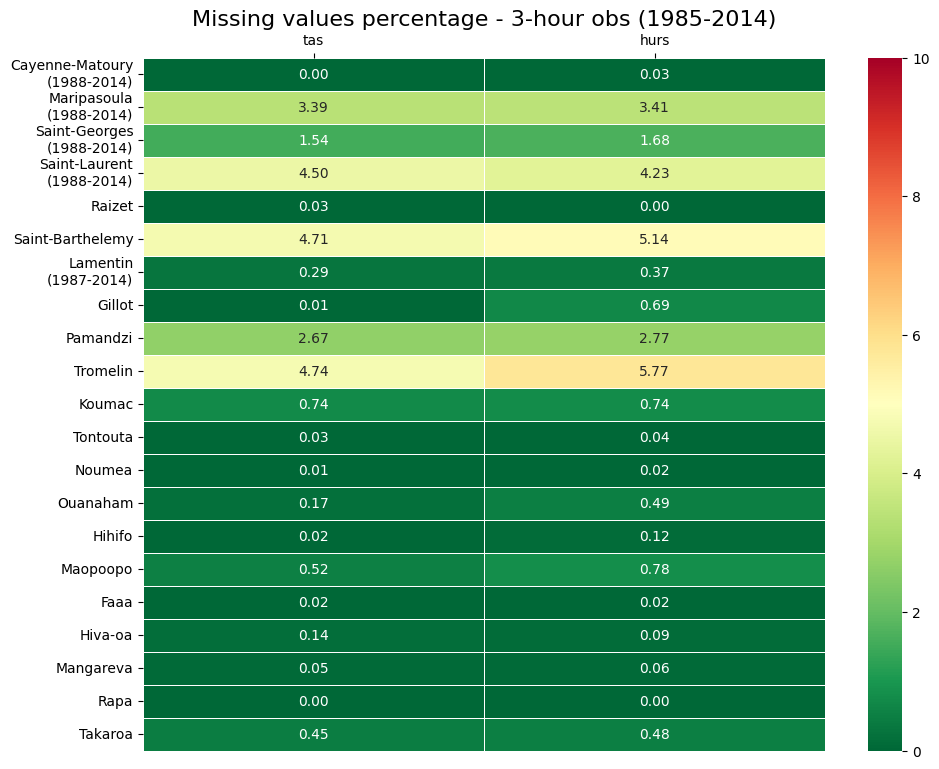

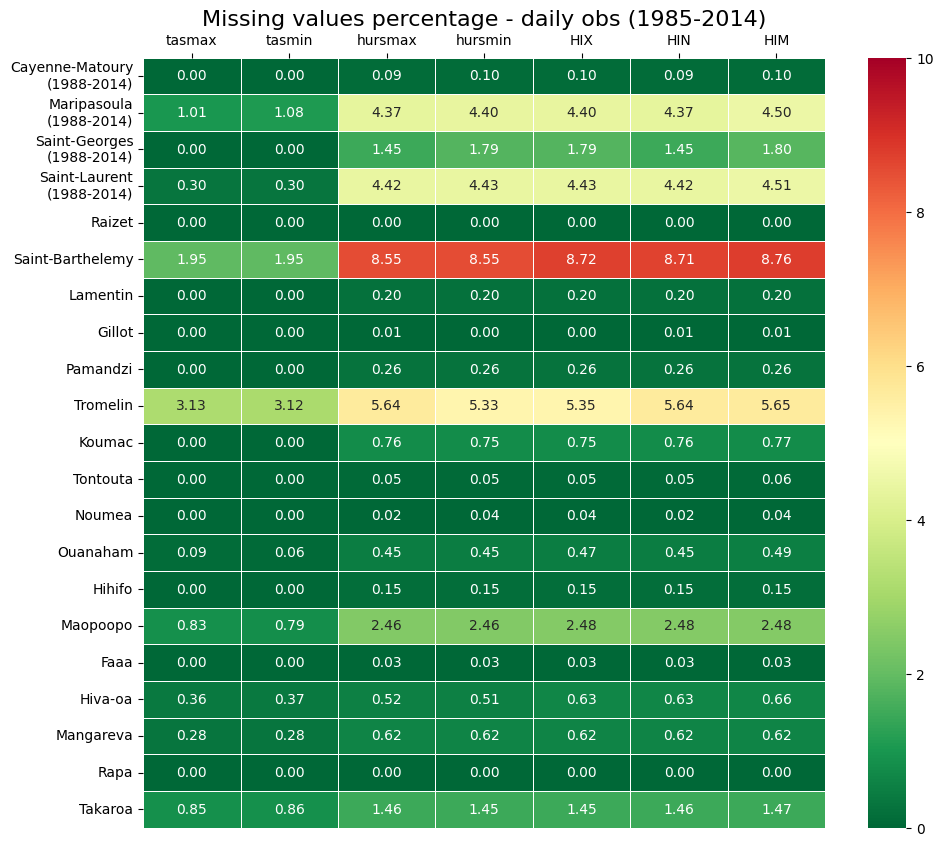

In [12]:
for tab in [dataframe_hourly]:
    fig, ax = plt.subplots(ncols=1,figsize=(11,9))
    sns.heatmap(tab, vmin=0, vmax=10, cmap = 'RdYlGn_r', linewidth=0.5,annot=True, annot_kws={'fontsize':10},fmt=".2f")
    ax.xaxis.tick_top()
    ax.set_title("Missing values percentage - 3-hour obs (1985-2014)",fontsize=16)

    
for tab in [dataframe_daily]:
    fig, ax = plt.subplots(ncols=1,figsize=(11,10))
    sns.heatmap(tab, vmin=0, vmax=10, cmap = 'RdYlGn_r', linewidth=0.5,annot=True, annot_kws={'fontsize':10},fmt=".2f")
    ax.xaxis.tick_top()
    ax.set_title("Missing values percentage - daily obs (1985-2014)",fontsize=16)
    